In [2]:
import numpy as np
import poke.poke_core as pol
import poke.plotting as plot
from astropy.io import fits
import astropy.units as u
import poppy
import matplotlib.pyplot as plt

In [3]:
# load jones pupil
pth = 'Subaru_M1-M3_750nm.fits'
jones_pupil = fits.open(pth)[0].data

# load scexao pupil
pupil_pth = 'scexao_pupil.fits'
pupil_data = fits.open(pupil_pth)[0].data

# Reclaim the complex numbers from the fits file ;-;
J11 = jones_pupil[:,:,0,0,0] + 1j*jones_pupil[:,:,0,0,1]
J12 = jones_pupil[:,:,0,1,0] + 1j*jones_pupil[:,:,0,1,1]

J21 = jones_pupil[:,:,1,0,0] + 1j*jones_pupil[:,:,1,0,1] 
J22 = jones_pupil[:,:,1,1,0] + 1j*jones_pupil[:,:,1,1,1] 

J11 *= pupil_data
J12 *= pupil_data
J21 *= pupil_data
J22 *= pupil_data

<ipython-input-4-c5762bff0637>:2: RuntimeWarning: invalid value encountered in true_divide
  plot.PlotJonesArray(J11/pupil_data,J12/pupil_data,J21/pupil_data,J22/pupil_data)


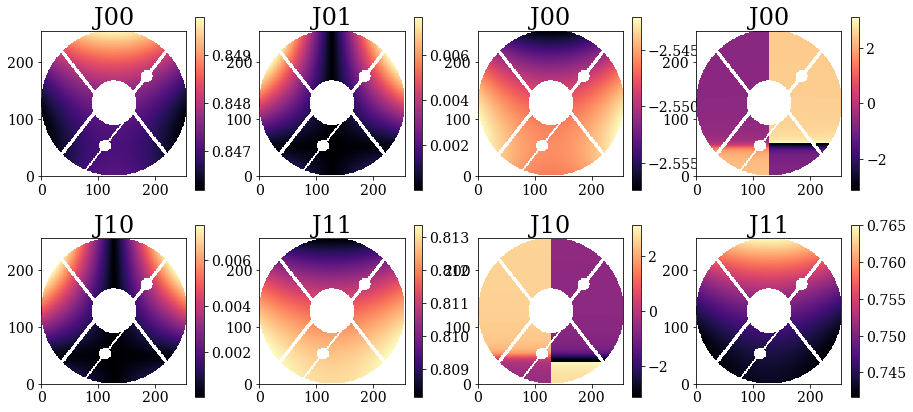

In [4]:
# Amplitude variation isn't shown in the on-diagonal elements because of the scale, but it's there!
plot.PlotJonesArray(J11/pupil_data,J12/pupil_data,J21/pupil_data,J22/pupil_data)

<ipython-input-83-e2cb369d947f>:15: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.abs(Ex_out)/pupil_data)
<ipython-input-83-e2cb369d947f>:20: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.angle(Ex_out)/pupil_data)
<ipython-input-83-e2cb369d947f>:25: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.abs(Ey_out)/pupil_data)
<ipython-input-83-e2cb369d947f>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.imshow(np.angle(Ey_out)/pupil_data)


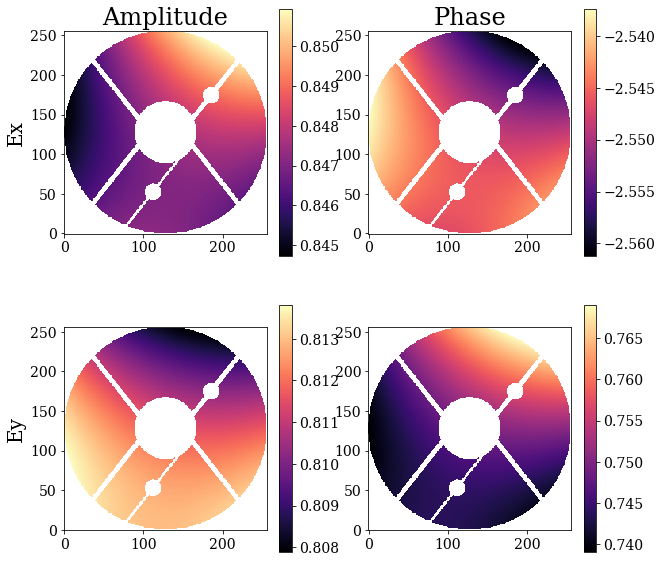

<ipython-input-83-e2cb369d947f>:75: RuntimeWarning: invalid value encountered in true_divide
  pol = ax.imshow(np.abs(J11)/pupil_data)


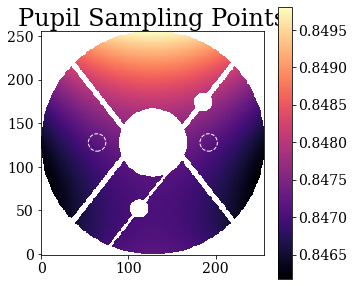

In [83]:
# Need a polarization state at two points in the pupil, some cases that might be interesting
# - Symmetric points
# - points along the plane of symmetry
# - anti-symmetric points

E = np.array([1,1])
Ex_out = J11*E[0] + J12*E[1]
Ey_out = J12*E[0] + J22*E[1]

plt.figure(figsize=[10,10])

plt.subplot(221)
plt.title('Amplitude')
plt.ylabel('Ex')
plt.imshow(np.abs(Ex_out)/pupil_data)
plt.colorbar()

plt.subplot(222)
plt.title('Phase')
plt.imshow(np.angle(Ex_out)/pupil_data)
plt.colorbar()

plt.subplot(223)
plt.ylabel('Ey')
plt.imshow(np.abs(Ey_out)/pupil_data)
plt.colorbar()

plt.subplot(224)
plt.imshow(np.angle(Ey_out)/pupil_data)
plt.colorbar()

plt.show()
# How big is the pupil?
dim = J11.shape[0]
quart = int(dim/4)

# Symmetric Points about X axis
p1x = Ex_out[int(dim/2),int(dim/2 + quart)]
p2x = Ex_out[int(dim/2),int(dim/2 - quart)]

p1y = Ey_out[int(dim/2),int(dim/2 + quart)]
p2y = Ey_out[int(dim/2),int(dim/2 - quart)]

# Symmetric Points about Y axis
# p1x = Ex_out[int(dim/2 + quart),int(dim/2)]
# p2x = Ex_out[int(dim/2 - quart),int(dim/2)]

# p1y = Ey_out[int(dim/2 + quart),int(dim/2)]
# p2y = Ey_out[int(dim/2 - quart),int(dim/2)]

E_out_1 = np.array([p1x,p1y])
E_out_2 = np.array([p2x,p2y])

# Plot the points chosen on the Jones Pupil
# plt.figure()
# plt.imshow()

from matplotlib.patches import Circle 

fig,ax = plt.subplots(nrows=1,ncols=1,figsize=[5,5])
ax.set_title('Pupil Sampling Points')

circ1 = Circle((int(dim/2 + quart),int(dim/2)),10,fill=False,linestyle='--',edgecolor='white')
ax.add_patch(circ1)

circ2 = Circle((int(dim/2 - quart),int(dim/2)),10,fill=False,linestyle='--',edgecolor='white')
ax.add_patch(circ2)

# circ1 = Circle((int(dim/2),int(dim/2 + quart)),10,fill=False,linestyle='--',edgecolor='white')
# ax.add_patch(circ1)

# circ2 = Circle((int(dim/2),int(dim/2 - quart)),10,fill=False,linestyle='--',edgecolor='white')
# ax.add_patch(circ2)

pol = ax.imshow(np.abs(J11)/pupil_data)
fig.colorbar(pol,ax=ax)

# ax[1].set_title('Scalar PSF')
# circ = Circle((npix,npix),pix_fpm,fill=False,linestyle='--',edgecolor='white')
# ax[1].add_patch(circ)
# sca = ax[1].imshow(ref_cropped,norm=LogNorm())
# fig.colorbar(sca,ax=ax[1])

# ax[2].set_title('Difference PSF')
# dif = ax[2].imshow(j11_cropped-ref_cropped)
# fig.colorbar(dif,ax=ax[2])

plt.show()


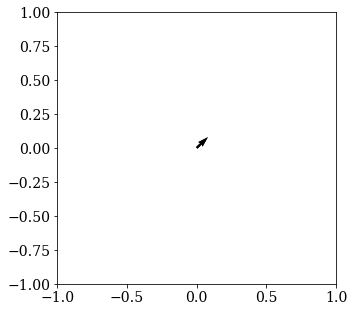

In [84]:
# Plot on Complex Plane

plt.figure(figsize=[5,5])
plt.quiver(np.abs(E_out_1[0]),np.abs(E_out_1[1]))
plt.quiver(np.abs(E_out_2[0]),np.abs(E_out_2[1]))
# plt.quiver(E_out_2)
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.show()

In [85]:
def ComputePolarizationEllipseFromJones(J):

    Ax = np.abs(J[0])
    Ay = np.abs(J[1])

    phx = np.angle(J[0])
    phy = np.angle(J[1])

    phi = phx-phy

    psi = 0.5*np.arctan2(2*Ax*Ay*np.cos(phi),(Ax**2 - Ay**2))

    a = np.sqrt(Ax**2 * np.cos(psi)**2 + Ay**2 * np.sin(psi)**2 + 2*Ax*Ay*np.cos(psi)*np.sin(psi)*np.cos(phi))
    b = np.sqrt(Ax**2 * np.sin(psi)**2 + Ay**2 * np.cos(psi)**2 - 2*Ax*Ay*np.cos(psi)*np.sin(psi)*np.cos(phi))

    return psi,a,b

In [86]:
psi,a,b = ComputePolarizationEllipseFromJones(E_out_1)

In [87]:
print('E1 out = <',np.abs(E_out_1[0]),' exp[i',np.angle(E_out_1[0])+np.pi,'] , ',np.abs(E_out_1[1]),' exp[i',np.angle(E_out_1[1]),']>')
print('E2 out = <',np.abs(E_out_2[0]),' exp[i',np.angle(E_out_2[0])+np.pi,'] , ',np.abs(E_out_2[1]),' exp[i',np.angle(E_out_2[1]),']>')

E1 out = < 0.8480110863216245  exp[i 0.5925374198387496 ] ,  0.8114533664727622  exp[i 0.7510789076936167 ]>
E2 out = < 0.8463798398794402  exp[i 0.5978786401216087 ] ,  0.8123721808353888  exp[i 0.7452610084151804 ]>


In [96]:
# Young's Double Pinhole Interferometer, but with Polarization!
# Dear god what's the equation ... maybe we can use poppy

def SphericalWave(d,amp,phase,wavelength):

    R = 25.4e-4
    npix = 512
    x = np.linspace(-R/25,R/25,npix)
    x,y = np.meshgrid(x,x)
    k = 2*np.pi/wavelength
    r = np.sqrt(x**2 + (y-d)**2 + R**2)
    E = amp*np.exp(1j*k*r)/r * np.exp(1j*phase)
    
    return E

def ConstructFullPolarizationImage(E_out_1,E_out_2,opd):

    dis = 0
    wl = 750e-9
    k = 2*np.pi/wl
    # Assume Efield is the same in both states, apply opd to one channel (E2)
    # Component in x-polarization
    E1 = SphericalWave(dis,np.abs(E_out_1[0]),np.angle(E_out_1[0]),wl)
    E2 = SphericalWave(-dis,np.abs(E_out_1[0]),np.angle(E_out_1[0]),wl)*np.exp(1j*k*opd)
    Efield_ref_x = E1 + E2

    # Component in y-polarization
    E1 = SphericalWave(dis,np.abs(E_out_1[1]),np.angle(E_out_1[1]),wl)
    E2 = SphericalWave(-dis,np.abs(E_out_1[1]),np.angle(E_out_1[1]),wl)*np.exp(1j*k*opd)
    Efield_ref_y = E1 + E2

    # E1 = SphericalWave(dis,1,0,wl)
    # E2 = SphericalWave(-dis,1,0,wl)*np.exp(1j*k*opd)
    # Efield_ref_x = E1 + E2

    # # Component in y-polarization
    # # E1 = SphericalWave(dis,np.abs(E_out_1[1]),np.angle(E_out_1[1]),wl)
    # # E2 = SphericalWave(-dis,np.abs(E_out_1[1]),np.angle(E_out_1[1]),wl)*np.exp(1j*k*opd)
    # Efield_ref_y = Efield_ref_x

    # Incoherently sum the opposing polarization states
    I_ref = np.abs(Efield_ref_x*np.conj(Efield_ref_x) + Efield_ref_y*np.conj(Efield_ref_y))

    # Assume Efield is different in both states, apply opd to one channel (E2)
    E1 = SphericalWave(dis,np.abs(E_out_1[0]),np.angle(E_out_1[0]),wl)
    E2 = SphericalWave(-dis,np.abs(E_out_2[0]),np.angle(E_out_2[0]),wl)*np.exp(1j*k*opd)
    Efield_test_x = E1 + E2

    E1 = SphericalWave(dis,np.abs(E_out_1[1]),np.angle(E_out_1[1]),wl)
    E2 = SphericalWave(-dis,np.abs(E_out_2[1]),np.angle(E_out_2[1]),wl)*np.exp(1j*k*opd)
    Efield_test_y = E1 + E2

    # Incoherently sum the opposing polarization states
    I_test = np.abs(Efield_test_x*np.conj(Efield_test_x) + Efield_test_y*np.conj(Efield_test_y))

    return I_ref,I_test

wl = 750e-9
opd = np.linspace(-wl,wl,256)
I_ref_list = []
I_test_list = []

for i in range(len(opd)):
    I_ref,I_test = ConstructFullPolarizationImage(E_out_1,E_out_2,opd[i])

    # Normalize to I_test
    # I_ref /= np.max(I_test)
    # I_test /= np.max(I_test)

    I_ref_list.append(I_ref[256,256])
    I_test_list.append(I_test[256,256])

# plt.figure(figsize=[15,5])
# plt.title('Youngs Interferometer Fringes')
# plt.xlabel('Detector Pixels')
# plt.ylabel('Normalized (to x) Irradiance')
# # plt.plot(I_ref_x[:,256],label='X Coherent',linewidth=3)
# # plt.plot(I_test_x[:,256],label='X Polarized',linewidth=3,linestyle='--')
# # plt.plot(I_ref_y[:,256],label='Y Coherent',linewidth=3,linestyle='--')
# # plt.plot(I_test_y[:,256],label='Y Polarized',linewidth=3,linestyle='--')
# plt.plot(I_ref[:,256],label='Single Polarization',linewidth=3)
# plt.plot(I_test[:,256],label='Two Polarization',linewidth=3,linestyle='--')
# plt.legend()
# plt.show()

# plt.figure(figsize=[15,5])
# plt.title('Coherent - Polarized')
# plt.xlabel('Detector Pixels')
# plt.ylabel('Fractional Irradiance Difference')
# plt.plot(I_ref[:,256]-I_test[:,256],linewidth=3)
# # plt.plot((I_ref_x[:,256]-I_test_x[:,256]))
# # plt.plot((I_ref_y[:,256]-I_test_y[:,256]))
# plt.legend()
# plt.show()

# def PrintVisibility(field):

#     max_field = np.max(field)
#     min_field = np.min(field)

#     print('Fringe Visibility = ',(max_field-min_field)/(max_field+min_field))

# print('Coherent Assumption')
# PrintVisibility(I_ref_x[:,256]+I_ref_y[:,256])

# print('Using Polarized Pupil')
# PrintVisibility(I_test_x[:,256]+I_test_y[:,256])

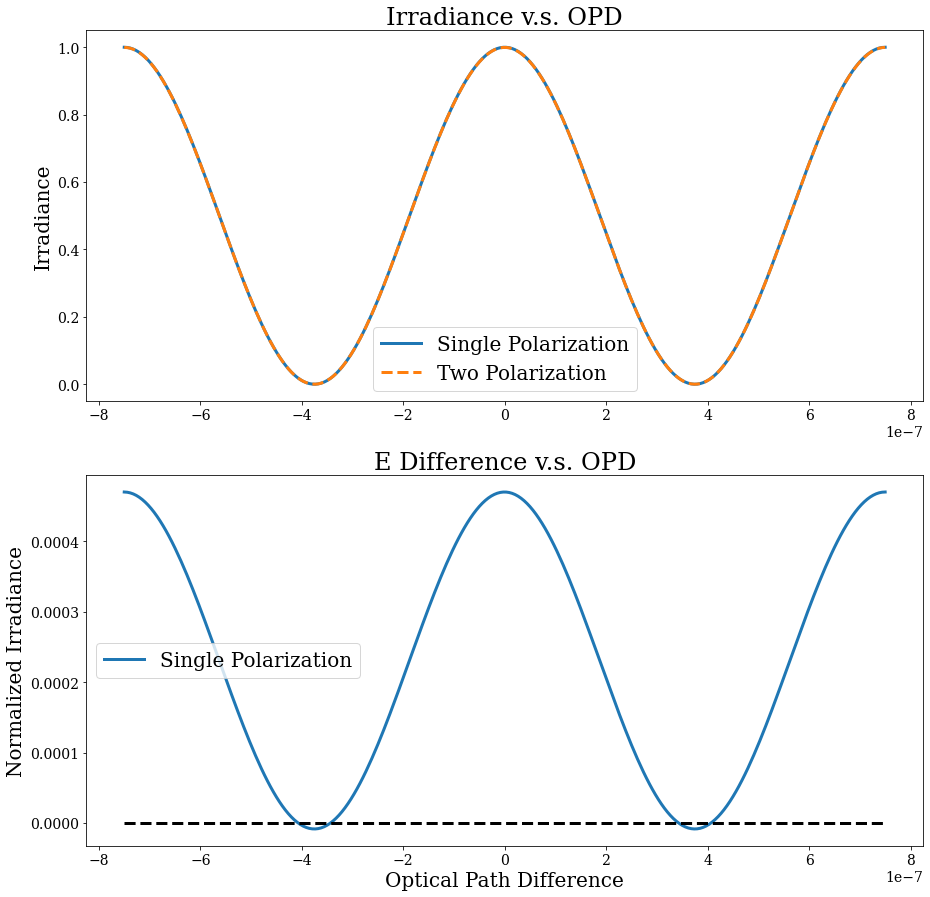

In [97]:
Idiff = []
Imax = max(I_ref_list)

plt.figure(figsize=[15,15])

plt.subplot(211)
plt.title('Irradiance v.s. OPD')
# plt.xlabel('Optical Path Difference')
plt.ylabel('Irradiance')
plt.plot(opd,I_ref_list/Imax,label='Single Polarization',linewidth=3)
plt.plot(opd,I_test_list/Imax,label='Two Polarization',linewidth=3,linestyle='--')
# plt.ylim([0,1e-3])
# plt.xlim([-4e-7,-3e-7])
plt.legend()
# plt.show()

for i in range(len(I_ref_list)):
    diff = I_ref_list[i]/Imax-I_test_list[i]/Imax
    Idiff.append(diff)

# plt.figure(figsize=[15,5])
plt.subplot(212)
plt.title('E Difference v.s. OPD')
plt.xlabel('Optical Path Difference')
plt.ylabel('Normalized Irradiance')
plt.plot(opd,Idiff,label='Single Polarization',linewidth=3)
plt.plot(opd,np.zeros(len(Idiff)),linewidth=3,linestyle='--',color='black')
# plt.plot(opd,I_test_list,label='Two Polarization',linewidth=3,linestyle='--')
# plt.ylim([0.99999,1])
plt.legend()
plt.show()

In [98]:
def PrintVisibility(field):

    max_field = np.max(field)
    min_field = np.min(field)

    print('Fringe Visibility = ',(max_field-min_field)/(max_field+min_field))

print('Single Polarization')
PrintVisibility(I_ref_list)
print('Two Polarization')
PrintVisibility(I_test_list)


E_out_1 = np.array([p1x,p1y])
E_out_2 = np.array([p2x,p2y])
print('E1 out = <',np.abs(E_out_1[0]),' exp[i',np.angle(E_out_1[0])+np.pi,'] , ',np.abs(E_out_1[1]),' exp[i',np.angle(E_out_1[1]),']>')
print('E2 out = <',np.abs(E_out_2[0]),' exp[i',np.angle(E_out_2[0])+np.pi,'] , ',np.abs(E_out_2[1]),' exp[i',np.angle(E_out_2[1]),']>')


Single Polarization
Fringe Visibility =  0.9999241129943588
Two Polarization
Fringe Visibility =  0.99990731853042
E1 out = < 0.8480110863216245  exp[i 0.5925374198387496 ] ,  0.8114533664727622  exp[i 0.7510789076936167 ]>
E2 out = < 0.8463798398794402  exp[i 0.5978786401216087 ] ,  0.8123721808353888  exp[i 0.7452610084151804 ]>


In [99]:
print('Null Depth Different = ',min(I_test_list/Imax))
print('Null Depth Same = ',min(I_ref_list)/Imax)

Null Depth Different =  4.6321097880738914e-05
Null Depth Same =  3.7944942584716206e-05
